In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

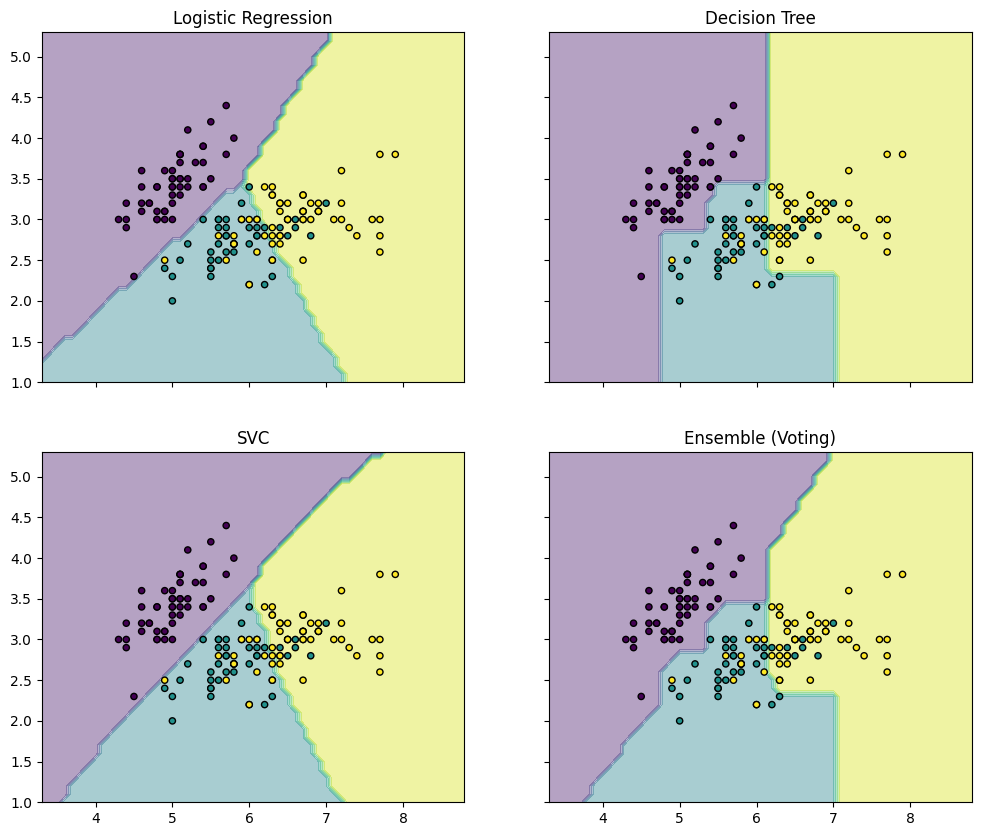

In [ ]:


# データの準備（可視化のため2次元に絞る）
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# モデルの定義
clf1 = LogisticRegression()                 # ロジスティック回帰
clf2 = DecisionTreeClassifier(max_depth=4)  # 決定木
clf3 = SVC(probability=True)                # Support Vector Classification
eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')

# プロットの準備
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 10))

for idx, clf, tt in zip([(0, 0), (0, 1), (1, 0), (1, 1)],
                        [clf1, clf2, clf3, eclf],
                        ['Logistic Regression', 'Decision Tree', 'SVC', 'Ensemble (Voting)']):
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()